In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df=pd.read_csv('mydatafiels.csv')
df

,ID,gender,age,income,score
0,1,Male,25,40000,85
1,2,Female,30,50000,90
2,3,Male,22,35000,78
3,4,Female,27,42000,88
4,5,Male,35,60000,92
...,...,...,...,...,...
85,86,Female,34,58000,92
86,87,Male,41,68500,87
87,88,Female,27,47000,80
88,89,Male,29,51000,82


In [11]:
print(df.columns)

Index(['ID', 'gender', 'age', 'income', 'score'], dtype='object')


In [12]:
from sklearn.cluster import KMeans

In [13]:
km=KMeans(n_clusters=8)
km.fit(df[['score','income']])


KMeans()

In [14]:
df['newCluster']=km.predict(df[['score','income']])


In [15]:
df.head()

,ID,gender,age,income,score,newCluster
0,1,Male,25,40000,85,4
1,2,Female,30,50000,90,3
2,3,Male,22,35000,78,6
3,4,Female,27,42000,88,4
4,5,Male,35,60000,92,5


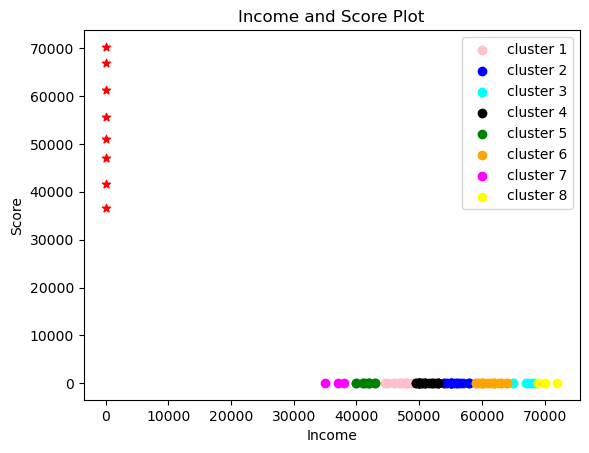

In [40]:
df0=df[df.newCluster==0]


df1=df[df.newCluster==1]
df2=df[df.newCluster==2]
df3=df[df.newCluster==3]
df4=df[df.newCluster==4]
df5=df[df.newCluster==5]
df6=df[df.newCluster==6]
df7=df[df.newCluster==7]

plt.scatter(center[:,0],center[:,1],color='red',marker='*')

plt.scatter(df0.income,df0.score, color='pink',label='cluster 1')
plt.scatter(df1.income,df1.score, color='blue',label='cluster 2')
plt.scatter(df2.income,df2.score, color='cyan',label='cluster 3')
plt.scatter(df3.income,df3.score, color='black',label='cluster 4')
plt.scatter(df4.income,df4.score, color='green',label='cluster 5')
plt.scatter(df5.income,df5.score, color='orange',label='cluster 6')
plt.scatter(df6.income,df6.score, color='magenta',label='cluster 7')
plt.scatter(df7.income,df7.score, color='yellow',label='cluster 8')
plt.title('Income and Score Plot')
plt.xlabel('Income')
plt.ylabel('Score')

plt.legend()
plt.show()

In [38]:
center=km.cluster_centers_
center

array([[   83.9375    , 47125.        ],
       [   84.4       , 55633.33333333],
       [   84.33333333, 66833.33333333],
       [   85.10526316, 51052.63157895],
       [   86.8       , 41550.        ],
       [   86.88235294, 61352.94117647],
       [   78.66666667, 36666.66666667],
       [   78.75      , 70250.        ]])

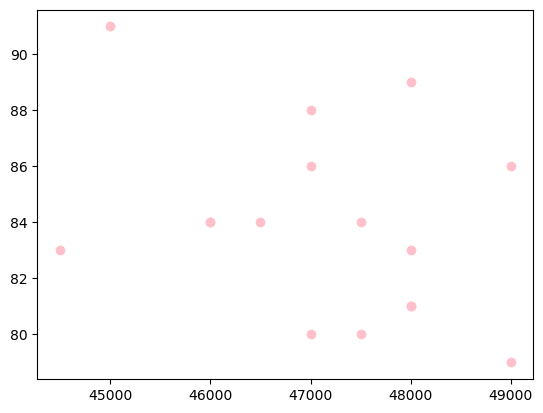

In [42]:

df0=df[df.newCluster==0]
plt.scatter(df0.income,df0.score, color='pink',label='cluster 1')



In [48]:
wcss=[]
cluster_range=range(1,15)
for i in cluster_range:
    km2=KMeans(n_clusters=i)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_)
wcss

[6495102122.622222,
 2053570869.8999996,
 996792944.2938873,
 565046669.2284793,
 319804830.069173,
 253537682.192954,
 188657577.69472277,
 127481809.6992168,
 123265876.68666416,
 79985446.94361472,
 70289571.76266234,
 63431393.25378788,
 54836121.257142864,
 49327833.4239899]

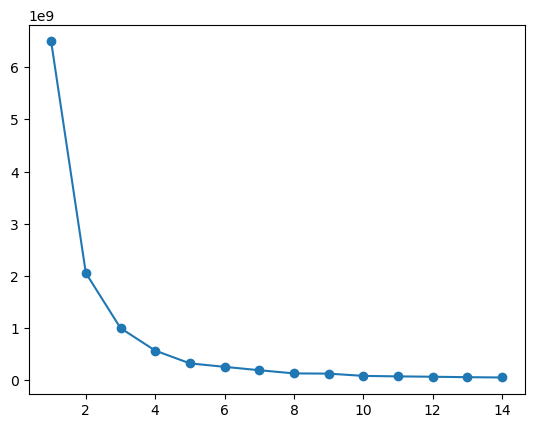

In [50]:
plt.plot(cluster_range,wcss,marker='o' )

In [52]:
from kneed import KneeLocator

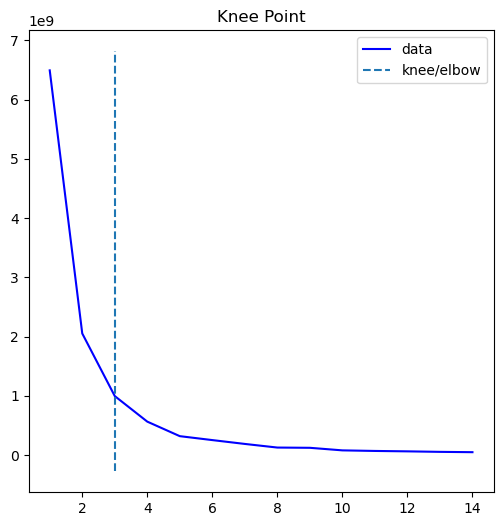

In [64]:
kn=KneeLocator(cluster_range,wcss, curve='convex' ,direction='decreasing')

kn.plot_knee()

In [68]:
km3=KMeans(n_clusters=3)
km3.fit(df[['income','score']])


AttributeError: module 'matplotlib.pyplot' has no attribute 'knee'

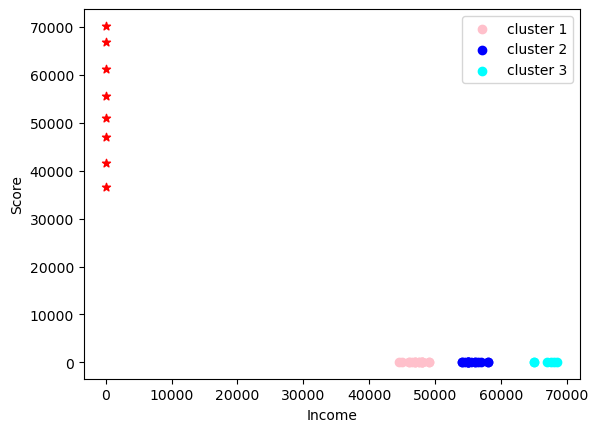

In [72]:
df0=df[df.newCluster==0]


df1=df[df.newCluster==1]
df2=df[df.newCluster==2]

plt.scatter(center[:,0],center[:,1],color='red',marker='*')
plt.scatter(df0.income,df0.score, color='pink',label='cluster 1')
plt.scatter(df1.income,df1.score, color='blue',label='cluster 2')
plt.scatter(df2.income,df2.score, color='cyan',label='cluster 3')


plt.xlabel('Income')
plt.ylabel('Score')

plt.legend()
plt.show()



In [70]:
kn.knee

3